In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

from piecewise import piecewise_linear_approximation
from piecewise import domain_to_bins
from piecewise import compute_histogram
from piecewise import averaging_histograms
from piecewise import histogram_counts_to_frequences
from piecewise import piecewise_linear_from_histogram
from piecewise import merge_piecewise_linear_observations
from piecewise import isotonic_unimodal_regression_R
from piecewise import RND_SEED
from piecewise import two_staged_sampling_piecewise_linear

In [2]:
#
# sampling data from a Bernoulli RV
perc = 0.3
n_obs = 100
data = numpy.random.binomial(n=1, p=perc, size=n_obs).astype(int)
domain = numpy.array([0, 1])

#
# MLE estimate bernoulli's theta
theta = numpy.sum(data) / n_obs
print('MLE theta {}'.format(theta))

MLE theta 0.32


In [3]:
#
# getting bins from domain values
bin_width = 1
center = True
bins = domain_to_bins(domain,
                      step=bin_width,
                      center=center)
print('From domains to bins: {} -> {}'.format(domain, bins))
bins = [bins]

From domains to bins: [0 1] -> [-0.5  0.5  1.5]


In [4]:
n_instances = data.shape[0]
samples = None
n_bootstraps = None

if n_bootstraps is not None:
    assert len(bins) == n_bootstraps, (len(bins), n_bootstraps)
    # if isinstance(bins, str):
    #     raise ValueError('Cannot perform bootstrapping on histograms'
    #                      ' with potentially different bins')
    if rand_gen is None:
        rand_gen = numpy.random.RandomState(RND_SEED)

    bootstrap_indices = [rand_gen.choice(n_instances,
                                             size=n_instances,
                                             replace=True)
                             for k in range(n_bootstraps)]
    samples = [data[bootstrap_indices[k]]
                   for k in range(n_bootstraps)]

elif len(bins) > 1 and not isinstance(bins, numpy.ndarray):
    samples = [data for i in range(len(bins))]

else:
    samples = [data]


In [5]:
assert len(bins) == len(samples), (len(bins), len(samples))
#
# computing histograms
histograms = [compute_histogram(s, bins=b, interval=None)
                  for s, b in zip(samples, bins)]
print(histograms)
hist, bins = histograms[0]

[(array([68, 32]), array([-0.5,  0.5,  1.5]))]


In [6]:
average_bootstraps = False
#
# averaging histograms?
if average_bootstraps:
    histograms = [averaging_histograms(histograms)]

In [7]:
alpha = 0.0
#
# from counts to frequencies (and smoothing?)
histograms = [histogram_counts_to_frequences(h, alpha)
              for h in histograms]

for h in histograms:
    print(h)

(array([ 0.68,  0.32]), array([-0.5,  0.5,  1.5]))


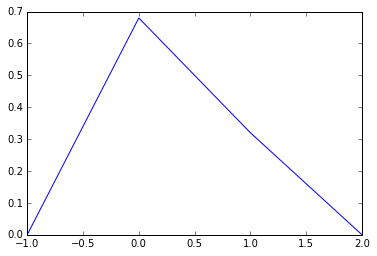

In [8]:
#
# piecewise linear functions from histogram tips
piecewises = [piecewise_linear_from_histogram(f, b, center=center, step=bin_width)
              for f, b in histograms]
for x, y in piecewises:
    pyplot.plot(x, y)
    pyplot.show()

In [9]:
#
# merging piecewise approximations
x_series = []
y_series = []
remove_duplicates = True

for x, y in piecewises:
    x_series.append(x)
    y_series.append(y)
x, y = merge_piecewise_linear_observations(x_series, y_series,
                                           remove_duplicates=remove_duplicates)
print(x, y)

[-1.  0.  1.  2.] [ 0.    0.68  0.32  0.  ]


In [10]:
#
# isotonic?
isotonic = True
if isotonic:
    x, y = isotonic_unimodal_regression_R(x, y, normalize=True)
    print(x, y)

[-1.  0.  1.  2.] [ 0.    0.68  0.32  0.  ]


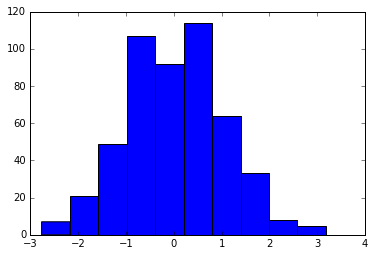

In [11]:
#
# sampling data from a Normal
data = numpy.random.randn(500)
pyplot.hist(data)
pyplot.show()

In [12]:
#
# to get the bins from a normal, we already have to compute the histogram
h1, domain_1 = compute_histogram(data, bins='auto', interval=None)
print(h1, domain_1)

[ 4  8  8 22 33 59 58 49 77 61 48 30 26  7  5  1  4] [-2.7646395  -2.41505642 -2.06547335 -1.71589027 -1.36630719 -1.01672412
 -0.66714104 -0.31755796  0.03202511  0.38160819  0.73119127  1.08077435
  1.43035742  1.7799405   2.12952358  2.47910665  2.82868973  3.17827281]


In [13]:
#
# to get the bins from a normal, we already have to compute the histogram
h2, domain_2 = compute_histogram(data, bins=20, interval=None)
print(h2, domain_2)

[ 3  4 11 10 23 26 55 52 39 53 61 53 40 24 20 13  6  2  1  4] [-2.7646395  -2.46749389 -2.17034827 -1.87320266 -1.57605704 -1.27891142
 -0.98176581 -0.68462019 -0.38747458 -0.09032896  0.20681665  0.50396227
  0.80110788  1.0982535   1.39539911  1.69254473  1.98969035  2.28683596
  2.58398158  2.88112719  3.17827281]


In [14]:
#
# to get the bins from a normal, we already have to compute the histogram
h3, domain_3 = compute_histogram(data, bins=100, interval=None)
print(h3, domain_3)

[ 1  0  0  1  1  1  1  1  0  1  2  4  1  2  2  2  0  1  3  4  1  8  2  5  7
  5  6  8  4  3  8 10 15 11 11  5 14  7 11 15  7 11  5  9  7  8 10 11  9 15
  9 17 16  6 13 11  9 15  8 10  6  6 13  6  9  4  6  6  4  4  3  8  2  5  2
  6  3  3  0  1  3  0  1  1  1  0  1  1  0  0  0  1  0  0  0  1  1  0  1  1] [-2.7646395  -2.70521038 -2.64578126 -2.58635213 -2.52692301 -2.46749389
 -2.40806476 -2.34863564 -2.28920652 -2.22977739 -2.17034827 -2.11091915
 -2.05149002 -1.9920609  -1.93263178 -1.87320266 -1.81377353 -1.75434441
 -1.69491529 -1.63548616 -1.57605704 -1.51662792 -1.45719879 -1.39776967
 -1.33834055 -1.27891142 -1.2194823  -1.16005318 -1.10062406 -1.04119493
 -0.98176581 -0.92233669 -0.86290756 -0.80347844 -0.74404932 -0.68462019
 -0.62519107 -0.56576195 -0.50633282 -0.4469037  -0.38747458 -0.32804546
 -0.26861633 -0.20918721 -0.14975809 -0.09032896 -0.03089984  0.02852928
  0.08795841  0.14738753  0.20681665  0.26624578  0.3256749   0.38510402
  0.44453315  0.50396227  0.56339139  

In [15]:
bins = [domain_1, domain_2, domain_3]

In [16]:
bins = [domain_1, domain_1, domain_1]

In [17]:
n_instances = data.shape[0]
samples = None
n_bootstraps = 3
rand_gen = None

if n_bootstraps is not None:
    assert len(bins) == n_bootstraps, (len(bins), n_bootstraps)
    # if isinstance(bins, str):
    #     raise ValueError('Cannot perform bootstrapping on histograms'
    #                      ' with potentially different bins')
    if rand_gen is None:
        rand_gen = numpy.random.RandomState(RND_SEED)

    bootstrap_indices = [rand_gen.choice(n_instances,
                                             size=n_instances,
                                             replace=True)
                             for k in range(n_bootstraps)]
    samples = [data[bootstrap_indices[k]]
                   for k in range(n_bootstraps)]

elif len(bins) > 1 and not isinstance(bins, numpy.ndarray):
    samples = [data for i in range(len(bins))]

else:
    samples = [data]


In [18]:
assert len(bins) == len(samples), (len(bins), len(samples))
#
# computing histograms
histograms = [compute_histogram(s, bins=b, interval=None)
                  for s, b in zip(samples, bins)]
print(histograms)
hist, bins = histograms[0]

[(array([ 3,  9,  4, 29, 21, 62, 62, 48, 67, 68, 46, 38, 17,  9, 10,  3,  4]), array([-2.7646395 , -2.41505642, -2.06547335, -1.71589027, -1.36630719,
       -1.01672412, -0.66714104, -0.31755796,  0.03202511,  0.38160819,
        0.73119127,  1.08077435,  1.43035742,  1.7799405 ,  2.12952358,
        2.47910665,  2.82868973,  3.17827281])), (array([ 4,  8,  4, 17, 26, 67, 78, 41, 91, 53, 44, 25, 25,  7,  7,  1,  2]), array([-2.7646395 , -2.41505642, -2.06547335, -1.71589027, -1.36630719,
       -1.01672412, -0.66714104, -0.31755796,  0.03202511,  0.38160819,
        0.73119127,  1.08077435,  1.43035742,  1.7799405 ,  2.12952358,
        2.47910665,  2.82868973,  3.17827281])), (array([ 5,  9,  6, 25, 31, 63, 62, 37, 89, 43, 54, 24, 32,  7,  6,  3,  4]), array([-2.7646395 , -2.41505642, -2.06547335, -1.71589027, -1.36630719,
       -1.01672412, -0.66714104, -0.31755796,  0.03202511,  0.38160819,
        0.73119127,  1.08077435,  1.43035742,  1.7799405 ,  2.12952358,
        2.47910665,

In [19]:
alpha = 0.0
#
# from counts to frequencies (and smoothing?)
histograms = [histogram_counts_to_frequences(h, alpha)
              for h in histograms]

for h in histograms:
    print(h)

(array([ 0.006,  0.018,  0.008,  0.058,  0.042,  0.124,  0.124,  0.096,
        0.134,  0.136,  0.092,  0.076,  0.034,  0.018,  0.02 ,  0.006,
        0.008]), array([-2.7646395 , -2.41505642, -2.06547335, -1.71589027, -1.36630719,
       -1.01672412, -0.66714104, -0.31755796,  0.03202511,  0.38160819,
        0.73119127,  1.08077435,  1.43035742,  1.7799405 ,  2.12952358,
        2.47910665,  2.82868973,  3.17827281]))
(array([ 0.008,  0.016,  0.008,  0.034,  0.052,  0.134,  0.156,  0.082,
        0.182,  0.106,  0.088,  0.05 ,  0.05 ,  0.014,  0.014,  0.002,
        0.004]), array([-2.7646395 , -2.41505642, -2.06547335, -1.71589027, -1.36630719,
       -1.01672412, -0.66714104, -0.31755796,  0.03202511,  0.38160819,
        0.73119127,  1.08077435,  1.43035742,  1.7799405 ,  2.12952358,
        2.47910665,  2.82868973,  3.17827281]))
(array([ 0.01 ,  0.018,  0.012,  0.05 ,  0.062,  0.126,  0.124,  0.074,
        0.178,  0.086,  0.108,  0.048,  0.064,  0.014,  0.012,  0.006,
        0

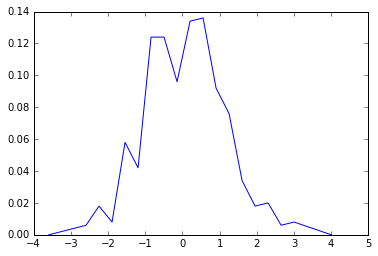

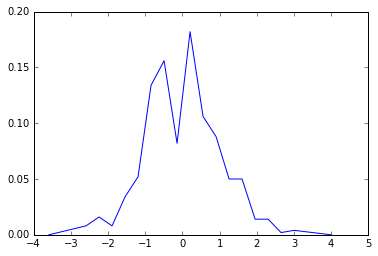

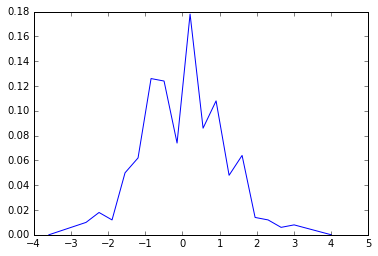

In [20]:
#
# piecewise linear functions from histogram tips
piecewises = [piecewise_linear_from_histogram(f, b, center=center, step=bin_width)
              for f, b in histograms]
for x, y in piecewises:
    pyplot.plot(x, y)
    pyplot.show()

[-3.58984796 -3.58984796 -3.58984796 -2.58984796 -2.58984796 -2.58984796
 -2.24026489 -2.24026489 -2.24026489 -1.89068181 -1.89068181 -1.89068181
 -1.54109873 -1.54109873 -1.54109873 -1.19151566 -1.19151566 -1.19151566
 -0.84193258 -0.84193258 -0.84193258 -0.4923495  -0.4923495  -0.4923495
 -0.14276642 -0.14276642 -0.14276642  0.20681665  0.20681665  0.20681665
  0.55639973  0.55639973  0.55639973  0.90598281  0.90598281  0.90598281
  1.25556588  1.25556588  1.25556588  1.60514896  1.60514896  1.60514896
  1.95473204  1.95473204  1.95473204  2.30431511  2.30431511  2.30431511
  2.65389819  2.65389819  2.65389819  3.00348127  3.00348127  3.00348127
  4.00348127  4.00348127  4.00348127] [ 0.     0.     0.     0.006  0.008  0.01   0.018  0.016  0.018  0.008
  0.008  0.012  0.058  0.034  0.05   0.052  0.062  0.042  0.126  0.124
  0.134  0.124  0.124  0.156  0.074  0.096  0.082  0.178  0.182  0.134
  0.106  0.086  0.136  0.088  0.108  0.092  0.05   0.048  0.076  0.05
  0.064  0.034  0.014  

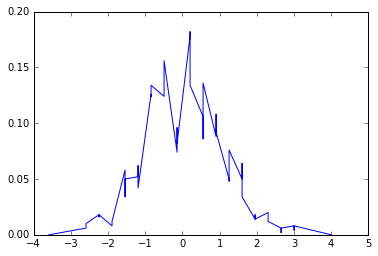

In [21]:
#
# merging piecewise approximations
x_series = []
y_series = []
remove_duplicates = False

for x, y in piecewises:
    x_series.append(x)
    y_series.append(y)
x, y = merge_piecewise_linear_observations(x_series, y_series,
                                           remove_duplicates=remove_duplicates)
print(x, y)
pyplot.plot(x, y)
pyplot.show()

[-3.58984796 -2.58984796 -2.24026489 -1.89068181 -1.54109873 -1.19151566
 -0.84193258 -0.4923495  -0.14276642  0.20681665  0.55639973  0.90598281
  1.25556588  1.60514896  1.95473204  2.30431511  2.65389819  3.00348127
  4.00348127] [ 0.     0.006  0.018  0.008  0.058  0.052  0.126  0.124  0.074  0.178
  0.106  0.088  0.05   0.05   0.014  0.02   0.006  0.008  0.   ]


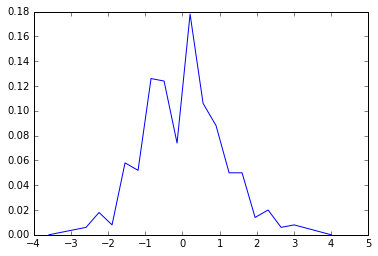

In [22]:
#
# merging piecewise approximations
x_series = []
y_series = []
remove_duplicates = True

for x, y in piecewises:
    x_series.append(x)
    y_series.append(y)
x, y = merge_piecewise_linear_observations(x_series, y_series,
                                           remove_duplicates=remove_duplicates)
print(x, y)
pyplot.plot(x, y)
pyplot.show()

[-3.42137282 -2.42137282 -2.07389563 -1.72641844 -1.37894124 -1.03146405
 -0.68398686 -0.33650967  0.01096753  0.35844472  0.70592191  1.05339911
  1.4008763   1.74835349  2.09583068  2.44330788  2.79078507  3.79078507] [ 0.          0.02927588  0.09368282  0.099538    0.16394493  0.2224967
  0.28983122  0.28983122  0.35716575  0.43328304  0.29861399  0.26348293
  0.14637941  0.06440694  0.03513106  0.02927588  0.01756553  0.        ]


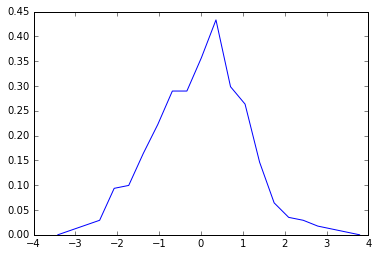

In [56]:
#
# isotonic?
isotonic = True
if isotonic:
    x, y = isotonic_unimodal_regression_R(x, y, normalize=True)
    print(x, y)
    pyplot.plot(x, y)
    pyplot.show()

[-3.42137282 -2.42137282 -2.07389563 -1.72641844 -1.37894124 -1.03146405
 -0.68398686 -0.33650967  0.01096753  0.35844472  0.70592191  1.05339911
  1.4008763   1.74835349  2.09583068  2.44330788  2.79078507  3.79078507] [ 0.          0.02835292  0.09072934  0.09639992  0.17011751  0.19279985
  0.28919977  0.30621152  0.35724678  0.34023502  0.32322327  0.25517627
  0.22115277  0.06237642  0.05670584  0.02835292  0.01701175  0.        ]


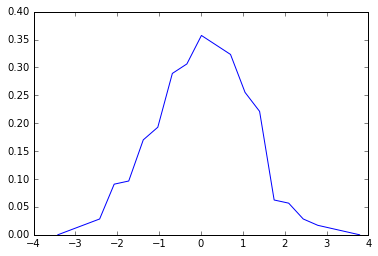

In [57]:
x, y = isotonic_unimodal_regression_R(piecewises[0][0], piecewises[0][1], normalize=True)
print(x, y)
pyplot.plot(x, y)
pyplot.show()

[-3.42137282 -2.42137282 -2.07389563 -1.72641844 -1.37894124 -1.03146405
 -0.68398686 -0.33650967  0.01096753  0.35844472  0.70592191  1.05339911
  1.4008763   1.74835349  2.09583068  2.44330788  2.79078507  3.79078507] [ 0.          0.03389807  0.03389807  0.10169422  0.15819101  0.19208908
  0.31261556  0.31261556  0.31261556  0.41807624  0.28813362  0.27118459
  0.14124197  0.10169422  0.07344583  0.05084711  0.02259872  0.        ]


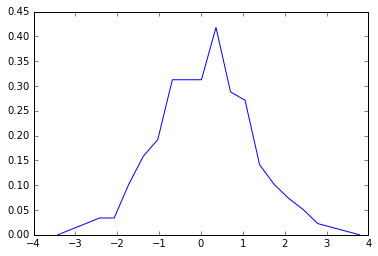

In [58]:
x, y = isotonic_unimodal_regression_R(piecewises[1][0], piecewises[1][1], normalize=True)
print(x, y)
pyplot.plot(x, y)
pyplot.show()

[-3.42137282 -2.42137282 -2.07389563 -1.72641844 -1.37894124 -1.03146405
 -0.68398686 -0.33650967  0.01096753  0.35844472  0.70592191  1.05339911
  1.4008763   1.74835349  2.09583068  2.44330788  2.79078507  3.79078507] [ 0.          0.02835292  0.07938817  0.11057638  0.11057638  0.21548218
  0.2806939   0.2806939   0.34590561  0.41395261  0.34023502  0.25517627
  0.22115277  0.08505876  0.0340235   0.01701175  0.01701175  0.        ]


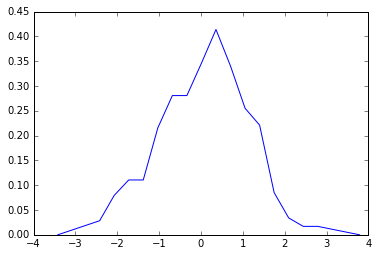

In [59]:
x, y = isotonic_unimodal_regression_R(piecewises[2][0], piecewises[2][1], normalize=True)
print(x, y)
pyplot.plot(x, y)
pyplot.show()

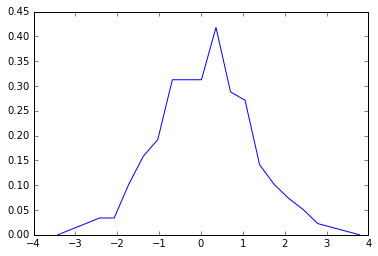

In [2]:
x = numpy.array([-3.42137282, -2.42137282, -2.07389563, -1.72641844, -1.37894124, -1.03146405,
 -0.68398686, -0.33650967,  0.01096753,  0.35844472,  0.70592191,  1.05339911,
  1.4008763,   1.74835349,  2.09583068,  2.44330788,  2.79078507,  3.79078507])

y = numpy.array([ 0.,          0.03389807,  0.03389807,  0.10169422,  0.15819101,  0.19208908,
  0.31261556,  0.31261556,  0.31261556,  0.41807624,  0.28813362,  0.27118459,
  0.14124197,  0.10169422,  0.07344583,  0.05084711,  0.02259872,  0.        ])
pyplot.plot(x, y)
pyplot.show()

[-0.6288478  -0.2249693  -0.34481949 -1.24471946 -1.03718053  0.98186001
 -0.13349329 -0.93133254  0.07301607 -0.88364216]


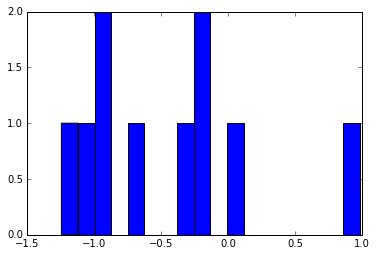

In [3]:
n_samples = 10
samples = two_staged_sampling_piecewise_linear(x, y, masses=None, n_samples=n_samples, sampling='rejection', rand_gen=None)
print(samples)
pyplot.hist(samples, bins=18, normed=True)
pyplot.show()

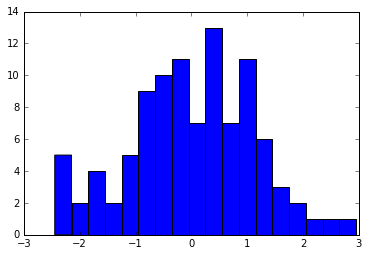

In [7]:
n_samples = 100
samples = two_staged_sampling_piecewise_linear(x, y, masses=None, n_samples=n_samples, sampling='rejection', rand_gen=None)
pyplot.hist(samples, bins=18, normed=True)
pyplot.show()

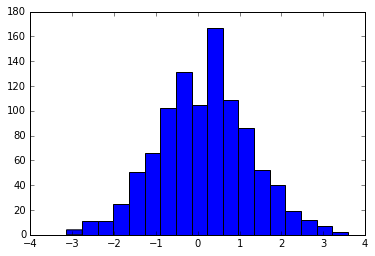

In [6]:
n_samples = 1000
samples = two_staged_sampling_piecewise_linear(x, y, masses=None, n_samples=n_samples, sampling='rejection', rand_gen=None)
pyplot.hist(samples, bins=18, normed=True)
pyplot.show()

[-0.6288478  -0.2249693  -0.34481949 ..., -0.50782897  1.01395041
 -0.45276199]


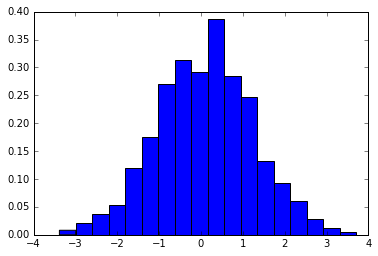

In [11]:
n_samples = 10000
samples = two_staged_sampling_piecewise_linear(x, y, masses=None, n_samples=n_samples, sampling='rejection', rand_gen=None)
print(samples)
pyplot.hist(samples, bins=18, normed=True)
pyplot.show()